In [2]:
!pip install pandas numpy matplotlib seaborn --quiet

In [3]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.1.3 which is incompatible.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 1.0.2 which is incompatible.


In [4]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
import time
import warnings
warnings.filterwarnings('ignore')

In [6]:
od.download('https://www.kaggle.com/c/bioresponse/data')

Skipping, found downloaded files in ".\bioresponse" (use force=True to force download)


In [7]:
os.listdir('bioresponse')


['.ipynb_checkpoints',
 '.jovianrc',
 'bioactivity.ipynb',
 'bioresponse',
 'data.db',
 'descriptors_output.csv',
 'descriptor_list.csv',
 'login.py',
 'logo.png',
 'myapp.py',
 'output.txt',
 'PaDEL-Descriptor',
 'paper final.ipynb',
 'predicted_model.pkl',
 'streamlit',
 'svm_benchmark.csv',
 'test.csv',
 'train.csv']

In [6]:
df = pd.read_csv('bioresponse/train.csv')

In [7]:
conda install -c conda-forge rdkit

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
import sys


In [8]:
import pandas as pd


In [9]:
df = pd.read_csv('bioresponse/train.csv')

In [11]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


In [12]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


In [13]:
sys.path.append('/usr/local/lib/python3.8/site-packages/')


Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

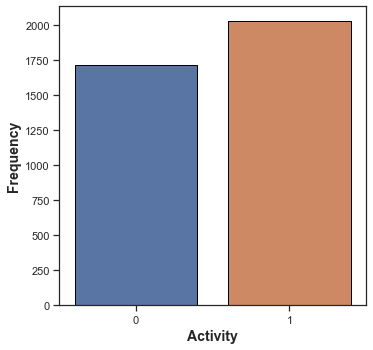

In [14]:

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Activity', data=df, edgecolor='black')

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

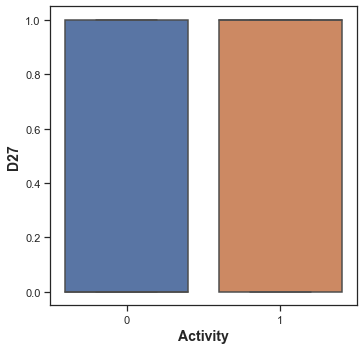

In [15]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Activity', y='D27', data=df)

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('D27', fontsize=14, fontweight='bold')

plt.savefig('D27vsActivity.pdf')

Statistical analysis | Mann-Whitney U Test



In [10]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Activity']
  df1 = df[selection]
  active = df[df.Activity == 1]
  active = active[descriptor]

  selection = [descriptor, 'Activity']
  df1 = df[selection]
  inactive = df[df.Activity == 0]
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [17]:
mannwhitney('D27')


,Descriptor,Statistics,p,alpha,Interpretation
0,D27,919140.0,2.913816e-184,0.05,Different distribution (reject H0)


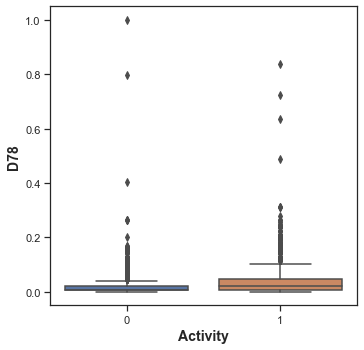

In [18]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Activity', y='D78', data=df)

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('D78', fontsize=14, fontweight='bold')

plt.savefig('D78vsActivity.pdf')

In [19]:
mannwhitney('D78')


,Descriptor,Statistics,p,alpha,Interpretation
0,D78,1296707.0,1.888880e-43,0.05,Different distribution (reject H0)


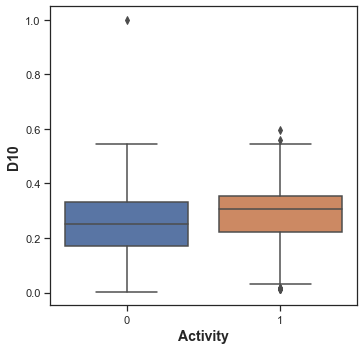

In [20]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Activity', y='D10', data=df)

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('D10', fontsize=14, fontweight='bold')

plt.savefig('D10vsActivity.pdf')

In [21]:
mannwhitney('D10')


,Descriptor,Statistics,p,alpha,Interpretation
0,D10,1390925.0,2.930879e-27,0.05,Different distribution (reject H0)


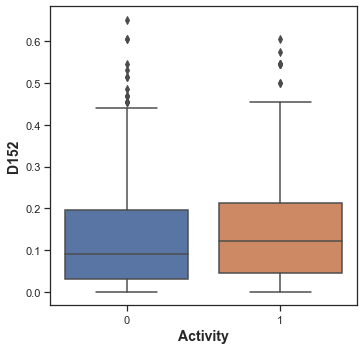

In [22]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Activity', y='D152', data=df)

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('D152', fontsize=14, fontweight='bold')

plt.savefig('D152vsActivity.pdf')

In [23]:
mannwhitney('D152')


,Descriptor,Statistics,p,alpha,Interpretation
0,D152,1545743.0,6.047208e-10,0.05,Different distribution (reject H0)


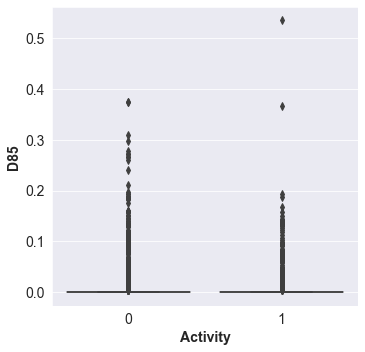

In [11]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='Activity', y='D85', data=df)

plt.xlabel('Activity', fontsize=14, fontweight='bold')
plt.ylabel('D85', fontsize=14, fontweight='bold')

plt.savefig('D85vsActivity.pdf')

In [12]:
mannwhitney('D85')


,Descriptor,Statistics,p,alpha,Interpretation
0,D85,1532082.5,4.908026e-24,0.05,Different distribution (reject H0)


In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [27]:

X = df.drop('Activity', axis=1)
X


D1        D2    D3   D4        D5        D6        D7        D8  \
0     0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1     0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2     0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3     0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4     0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   
...        ...       ...   ...  ...       ...       ...       ...       ...   
3746  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659  0.376124   
3747  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876  0.404546   
3748  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341  0.471179   
3749  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713  0.447162   
3750  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667  0.272652   

            D9       D10       D11     D12       D13       D14       D15  \
0     0.743663  0.243144  0.187856  0.0000  0.000000  0.069000  0.362012   
1     0.836582  0.106480  0.101382  0.1875  0.193548  0.131001  0.350206   
2     0.679051  0.352308  0.193548  0.1250  0.000000  0.068900  0.574628   
3     0.805110  0.208989  0.000000  0.0000  0.000000  0.145947  0.584688   
4     0.812646  0.125177  0.532258  0.0000  0.000000  0.094900  0.540323   
...        ...       ...       ...     ...       ...       ...       ...   
3746  0.727093  0.308163  0.000000  0.0000  0.000000  0.071800  0.362006   
3747  0.787935  0.192527  0.085200  0.2500  0.064500  0.121309  0.347521   
3748  0.872241  0.122132  0.624027  0.1875  0.064500  0.091700  0.519094   
3749  0.672689  0.372936  0.319355  0.1875  0.000000  0.273901  0.549001   
3750  0.854116  0.140316  0.736973  0.1250  0.000000  0.097900  0.548488   

           D16       D17       D18       D19       D20      D21       D22  \
0     0.301773  0.597930  0.190813  0.107219  0.070500  0.00717  0.137931   
1     0.187419  0.762669  0.180473  0.329962  0.107681  0.01950  0.206897   
2     0.283327  0.510633  0.184480  0.073300  0.061600  0.00566  0.000000   
3     0.325247  0.496745  0.242288  0.087700  0.075300  0.01680  0.000000   
4     0.116775  0.552982  0.167897  0.116140  0.054200  0.01350  0.103448   
...        ...       ...       ...       ...       ...      ...       ...   
3746  0.229374  0.603893  0.129706  0.092400  0.036100  0.00473  0.069000   
3747  0.250846  0.660747  0.221975  0.167944  0.065700  0.00939  0.172414   
3748  0.243037  0.691896  0.215831  0.338637  0.290643  0.04450  0.103448   
3749  0.567326  0.427189  0.332955  0.168837  0.105198  0.02240  0.034500   
3750  0.170359  0.608174  0.198938  0.161527  0.302829  0.02470  0.069000   

      D23   D24       D25       D26  D27  D28       D29       D30       D31  \
0       1  0.00  0.496683  0.753131    1    1  0.000000  0.262919  0.077200   
1       0  0.75  0.449869  0.720484    0    0  0.666667  0.099400  0.289240   
2       1  0.00  0.486610  0.803577    0    1  0.000000  0.428659  0.032400   
3       1  0.00  0.459122  0.829482    0    1  0.000000  0.435410  0.118562   
4       1  0.00  0.381883  0.913374    0    1  0.000000  0.305333  0.054100   
...   ...   ...       ...       ...  ...  ...       ...       ...       ...   
3746    1  0.00  0.486439  0.783710    1    1  0.000000  0.364694  0.136861   
3747    1  0.00  0.390864  0.815279    0    1  0.000000  0.153533  0.127563   
3748    1  0.00  0.590995  0.581372    0    0  0.333333  0.128839  0.357203   
3749    1  0.00  0.471154  0.795728    1    1  0.000000  0.282592  0.005600   
3750    1  0.00  0.477220  0.821335    0    1  0.000000  0.221986  0.217089   

           D32       D33      D34       D35       D36   D37       D38  \
0     0.082700  0.200590  0.00000  0.000000  0.000000  0.00  0.162383   
1     0.216710  0.100295  0.16958  0.235294  0.000000  0.00  0.119104   
2     0.072400  0.000000  0.03930  0.000000  0.000000  0.

In [28]:

Y = df.Activity
Y

0       1
1       1
2       1
3       1
4       0
       ..
3746    1
3747    1
3748    0
3749    1
3750    0
Name: Activity, Length: 3751, dtype: int64

Examining the data dimension


In [29]:

X.shape


(3751, 1776)

In [30]:
Y.shape


(3751,)

In [31]:

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)


In [32]:
X.shape


(3751, 194)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [34]:
X_train.shape, Y_train.shape


((3000, 194), (3000,))

In [35]:
X_test.shape, Y_test.shape


((751, 194), (751,))

In [36]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2


0.36956865240239

In [37]:
Y_pred = model.predict(X_test)


Scatter Plot of Experimental vs Predicted D27 Values

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

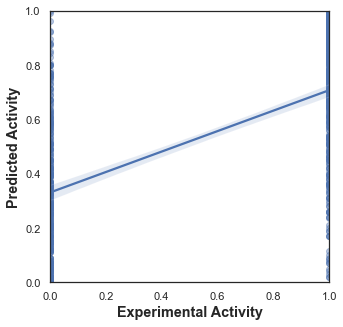

In [38]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental Activity', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted Activity', fontsize='large', fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.figure.set_size_inches(5, 5)
plt.show

In [39]:

! pip install lazypredict --user

  Using cached scikit_learn-0.23.1-cp38-cp38-win_amd64.whl (6.8 MB)


In [40]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install Scikit-learn==0.22


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\sklearn\\__check_build\\_check_build.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: Scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
  Rolling back uninstall of scikit-learn
  Moving to c:\users\aishwarya\appdata\roaming\python\python38\site-packages\scikit_learn-0.23.1.dist-info\
   from C:\Users\Aishwarya\AppData\Roaming\Python\Python38\site-packages\~cikit_learn-0.23.1.dist-info
  Moving to c:\users\aishwarya\appdata\roaming\python\python38\site-packages\sklearn\
   from C:\Users\Aishwarya\AppData\Roaming\Python\Python38\site-packages\~klearn


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict


from lazypredict.Supervised import LazyRegressor

C:\Users\Aishwarya\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:

X = df.drop('Activity', axis=1)
Y = df.Activity

In [5]:
X.shape

(3751, 1776)

In [6]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(3751, 194)

In [7]:

# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<?, ?it/s]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.98,0.98,0.07,0.21
ExtraTreeRegressor,0.98,0.98,0.07,0.19
ExtraTreesRegressor,0.98,0.98,0.07,10.01
GaussianProcessRegressor,0.98,0.98,0.07,10.50
XGBRegressor,0.94,0.95,0.11,1.78
MLPRegressor,0.94,0.95,0.11,11.91
RandomForestRegressor,0.89,0.90,0.16,7.14
BaggingRegressor,0.86,0.87,0.18,0.96
SVR,0.74,0.76,0.24,7.42


In [10]:
# Performance table of the test set (20% subset)
predictions_test


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


Data visualization of model performance

[(0.0, 1.0)]

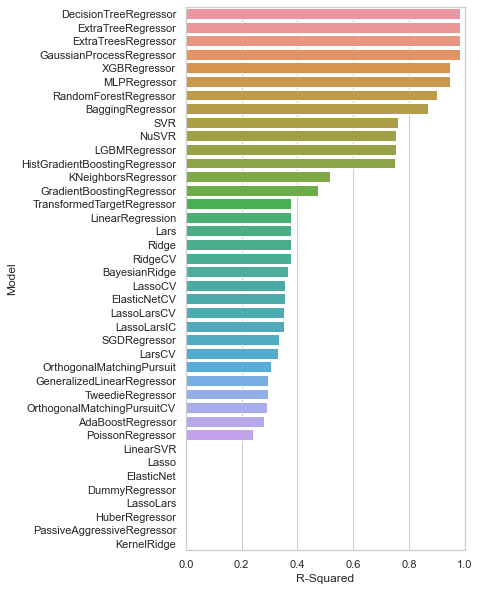

In [11]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))


[(0.0, 10.0)]

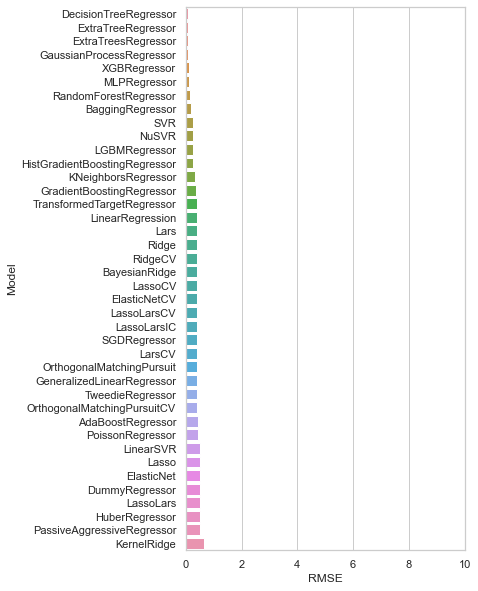

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

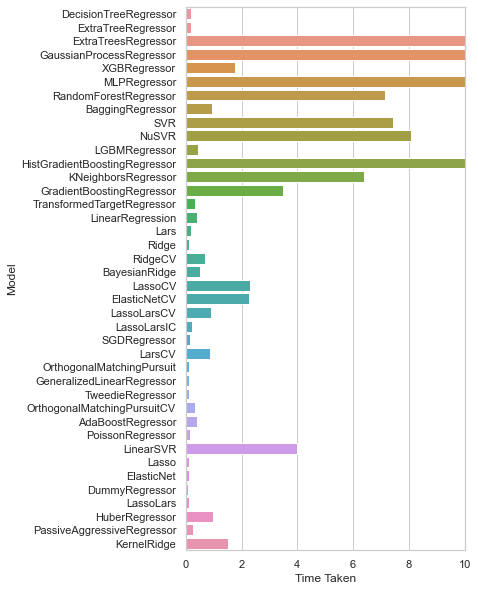

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))


In [1]:
pip install subprocess


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement subprocess
ERROR: No matching distribution found for subprocess


In [2]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle
ERROR: No matching distribution found for pickle


In [3]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os
ERROR: No matching distribution found for os


In [4]:
pip install streamlit==0.71.0

  Using cached streamlit-0.71.0-py2.py3-none-any.whl (7.4 MB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached GitPython-3.1.24-py3-none-any.whl (180 kB)
  Using cached enum_compat-0.0.3-py3-none-any.whl (1.3 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached s3transfer-0.5.0-py3-none-any.whl (79 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2021.5-py2.py3-none-any.whl (339 kB)
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size

In [5]:
pip install pandas==1.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.



  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


lazypredict 0.2.9 requires pandas==1.0.5, but you have pandas 1.1.3 which is incompatible.


In [6]:
pip install base58==2.0.1


  Using cached base58-2.0.1-py3-none-any.whl (4.3 kB)
Note: you may need to restart the kernel to use updated packages.Installing collected packages: base58
  Attempting uninstall: base58
    Found existing installation: base58 2.1.1
    Uninstalling base58-2.1.1:
      Successfully uninstalled base58-2.1.1



In [1]:

import pandas as pd


In [2]:

dataset_url = 'https://raw.githubusercontent.com/aishwarya832002/aishwarya832002/main/train.csv'
dataset = pd.read_csv(dataset_url)
dataset

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = dataset.drop(['Activity'], axis=1)
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3746    0
3747    0
3748    0
3749    0
3750    0
Name: D1776, Length: 3751, dtype: int64

Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,D27,D51,D52,D94,D194,D204,D218,D952,D953,D954,...,D1422,D1425,D1427,D1429,D1430,D1431,D1434,D1436,D1441,D1445
0,1,0,1.000000,0,0.000000,0.795681,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0.578947,1,0.809117,0.578851,0.831682,1,0,0,...,1,0,1,1,0,0,0,1,1,0
2,0,1,1.000000,0,0.000000,0.796292,0.701650,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.000000,0,0.000000,0.003990,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.000000,1,0.744923,0.003990,0.000000,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0,1.000000,0,0.000000,0.798248,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3747,0,1,0.608696,1,0.830659,0.660473,0.721307,0,0,0,...,1,0,1,0,0,1,0,1,0,0
3748,0,1,1.000000,1,0.838837,0.003990,0.767409,0,1,1,...,1,0,1,0,0,0,0,1,0,0
3749,1,1,1.000000,0,0.839547,0.003990,0.674172,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)


Random Forest Regression Model

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9374169712282864

Model Prediction

In [9]:
Y_pred = model.predict(X)
Y_pred

array([0.   , 0.   , 0.   , ..., 0.092, 0.   , 0.   ])

Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 0.94


Data Visualization

In [13]:

import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental ')

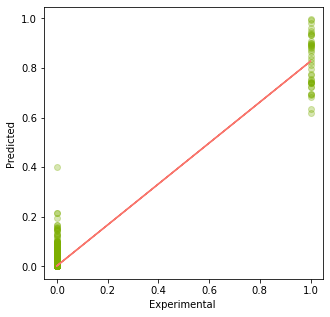

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted ')
plt.xlabel('Experimental ')

In [24]:
import pickle


In [25]:
pickle.dump(model, open('activity_model.pkl', 'wb'))
